#**Project NLP**
> Analisis Sentimen Komentar Masyarakat terhadap Sirkuit Mandalika pada Media Sosial Twitter

### Tweet Crawling




In [1]:
!pip install --upgrade git+https://github.com/kevctae/twint.git
!pip install -qq whatthelang
!pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-wqxzx6tt
  Running command git clone -q https://github.com/kevctae/twint.git /tmp/pip-req-build-wqxzx6tt
     |████████████████████████████████| 1.1 MB 14.0 MB/s 
     |████████████████████████████████| 263 kB 55.4 MB/s 
     |████████████████████████████████| 382 kB 10.6 MB/s 
     |████████████████████████████████| 291 kB 10.0 MB/s 
     |████████████████████████████████| 271 kB 60.2 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
     |████████████████████████████████| 144 kB 44.7 MB/s 
     |████████████████████████████████| 49 kB 3.6 MB/s 
     |████████████████████████████████| 59 kB 6.6 MB/s 
     |████████████████████████████████| 138 kB 44.7 MB/s 
     |████████████████████████████████| 62 kB 987 kB/s 
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=39179 sha256=af1c2d221eb7d

In [2]:
# Import Library
import twint
import nest_asyncio
# Additional library for get rids of some errors
nest_asyncio.apply()

In [3]:
# Instantiate and configure the twint-object
c = twint.Config()
c.Store_object = True
c.Pandas = True
c.Search = "Mandalika"
c.Since = '2020-03-02'
c.Until = '2022-03-21'
c.Lang = "id"
c.Limit = 1000

# Run search
twint.run.Search(c)

1505695678424842240 2022-03-20 23:59:58 +0000 <garpulicious> Belajar dari mandalika Tidak semua hal bisa diterima dengan logika.
1505695659697278977 2022-03-20 23:59:54 +0000 <MalikAlfarizi12> MotoGP Mandalika sukses.. #AniesBaswedan  https://t.co/hhO27duaZO
1505695642974228481 2022-03-20 23:59:50 +0000 <adhimmhrdika> @ngawur_post Tikungan 13 Mandalika membuat Marc Marquez terjatuh dan motor Alex Rins terbakar, ini menurut pendapat lesti dan billar.
1505695638549266435 2022-03-20 23:59:49 +0000 <FemmyManroe> @eadala_o1 @kulitbumi TENGKYUUU SO MUCHHH PAK JOKOWI.. Acara MANDALIKA SUKSEESSSSS...   Kadal kejang kejang Pak @jokowi . SUKSESSS
1505695601031520261 2022-03-20 23:59:40 +0000 <geloraco> Rara Istiati Wulandari, Ungkap Penyebab Gangguan Hujan Deras saat MotoGP Mandalika  https://t.co/WQeOflIc2u
1505695522350596096 2022-03-20 23:59:21 +0000 <dedensujana> Salah satu yg terpenting bagaimana memelihara Circuit Mandalika jangan sampai seperti gedung2 bekas PON yg terbekalai krn gak keur

In [4]:
# Cleanup
tweets = twint.storage.panda.Tweets_df.drop_duplicates(subset=['id'])
# Reindex
tweets.index = range(len(tweets))
# Remove non-Indonesian
from whatthelang import WhatTheLang
wtl = WhatTheLang()

# This function makes easy to handle exceptions (e.g. no text where text should be)
# Not really needed but can be useful 
def detect_lang(text):
    try: 
        return wtl.predict_lang(text)
    except Exception:
        return 'exp'

# Added performance measure here
tweets['lang'] = tweets['tweet'].map(lambda t: detect_lang(t))
# keep only Indonesian
tweets = tweets[tweets.lang == 'id']

# Exporting
# tweets.to_json('dataset.json')
tweets.to_csv('dataset.csv')

### Preprocessing Data

In [5]:
!pip install sastrawi
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 13.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk, re, string
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
data = pd.read_csv('dataset.csv')
data.drop(['Unnamed: 0','conversation_id','created_at','timezone','place','language','hashtags','cashtags','user_id','user_id_str','day','hour','link','urls','photos','video','thumbnail','retweet','nlikes','nreplies','nretweets','quote_url','search','near','geo','source','user_rt_id','user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','trans_dest','lang','name','id'], axis=1, inplace=True)
data.sample(n=3)

,date,tweet,username
138,2022-03-20 23:34:19,Pawang hujan lokal gagal disirkuit Mandalika ...,batusangkak
252,2022-03-20 23:04:42,Siapa suruh datang ke Mandalika ?,AgusBoedibaik
168,2022-03-20 23:27:37,Pembangunan Infrastruktur Telekomunikasi Dalam...,KatokRombeng


In [8]:
# Create Sastrawi stemmer
stemmer = StemmerFactory().create_stemmer()
# Create Stopword
with open("Stopword.txt", "r") as f:
    stop_words = f.readline()
    stop_words = stop_words.split()
# Preprocessor
def preprocessor(text):
    # Convert to lower case
    text = text.lower()
    # Remove additional code
    text = text.replace("\\xe2\\x80\\xa6", "")
    # Convert www.* or https?://* to URL
    text = re.sub("((www\.[^\s]+)|(https?://[^\s]+))", "", text)
    # Convert @username to AT_USER
    text = re.sub("@[^\s]+", "", text)
    # Remove additional white spaces
    text = re.sub("[\s]+", " ", text)
    # Replace #word with word
    text = re.sub(r"#([^\s]+)", r"\1", text)
    # Menghapus angka dari teks
    text = re.sub(r"\d+", "", text)
    # Menganti tanda baca dengan spasi
    text = text.translate(str.maketrans(string.punctuation, " " * len(string.punctuation)))
    return text

In [9]:
data["tweet_clean"] = data["tweet"].apply(lambda x: preprocessor(x))
data = data.drop_duplicates()
data.sample(n=3)

,date,tweet,username,tweet_clean
662,2022-03-20 19:15:32,Dari Mandalika baru sadar bahwa pemodal itu ad...,bebenyittalks,dari mandalika baru sadar bahwa pemodal itu ad...
463,2022-03-20 22:06:03,"MotoGP Mandalika: Kekecewaan Marquez, Pawang H...",KompasBola,motogp mandalika kekecewaan marquez pawang h...
595,2022-03-20 20:27:05,"@Mentimoen Ngehype MotoGP Mandalika dari pagi,...",RiekaRanriva,ngehype motogp mandalika dari pagi jam dini...


In [10]:
# Tokenizer
def tokenizer(text):
    words = word_tokenize(text)
    tokens = []
    for w in words:
        # add tokens
        if len(w) > 3 and w not in stop_words:
            w = stemmer.stem(w)
            tokens.append(w.lower())
    return " ".join(tokens)

In [11]:
data['tweet_clean'] = data['tweet_clean'].apply(lambda x : tokenizer(x))
data = data.drop_duplicates()
data.sample(n=3)

,date,tweet,username,tweet_clean
508,2022-03-20 21:26:41,@ciaobeyya kalau ga mandalika aja deh yang dib...,fxiqaf,kalau mandalika yang buat wkwk
645,2022-03-20 19:31:20,@Relawananies @didienAZHAR Ini bukti hasil kar...,edo_macho,bukti hasil karya ruaaar binasaaah nama indone...
131,2022-03-20 23:37:05,"""bangke mandalika, belokannya kenceng banget d...",iHeriartooo,bangke mandalika belok kenceng banget tapi gap...


In [12]:
data.to_csv('clean_dataset.csv')

### Text Vectorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
vectorizer_tfidf = TfidfVectorizer(max_features=1000)

In [15]:
word_tfidf = vectorizer_tfidf.fit_transform(data["tweet_clean"].values)
word_tfidf

<702x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 8537 stored elements in Compressed Sparse Row format>

In [16]:
# Nama fitur
nama_fitur = vectorizer_tfidf.get_feature_names_out()

# Dimensi data
dimensions = word_tfidf.get_shape()
print(f"tweet_clean  = {dimensions[0]}")
print(f"max_features = {dimensions[1]}")

tweet_clean  = 702
max_features = 1000


In [17]:
content1, content2 = [], []

for n in range(dimensions[0]):
    # Convert sparse matrix row by row
    row = word_tfidf.getrow(n).toarray()[0].ravel()
    # Get top values and its indexes
    top_ten_indices = row.argsort()[-1]
    top_ten_values = row[row.argsort()[-1]]
    # Identify the highest TFIDF value and word #
    highestTFIDFword = nama_fitur[top_ten_indices]
    highestTFIDFvalue = top_ten_values
    top1word = {
        "nomor tweet": n + 1,
        "nilai TFIDF": highestTFIDFvalue,
        "top word": highestTFIDFword,
    }
    content1.append(top1word)
    content2.append(highestTFIDFword)

# Hitung Frekuiensi kata dengan bobot terbesar
content2 = np.asarray(content2)
words, n = np.unique(content2, return_counts=True)

# Convert to DataFrame lalu urutkan secara descending
# lalu pilih 20 kata dengan frekuensi terbesar
words_data = (
    pd.DataFrame({"Kata": words, "Banyak": n}).sort_values(by="Banyak", ascending=False).head(20)
)
words_data

,Kata,Banyak
23,axiata,18
263,masyarakat,12
432,telekomunikasi,9
269,merchandise,6
70,cepat,5
404,serah,5
167,kadrun,5
240,lombok,4
115,gara,4
485,widodo,4


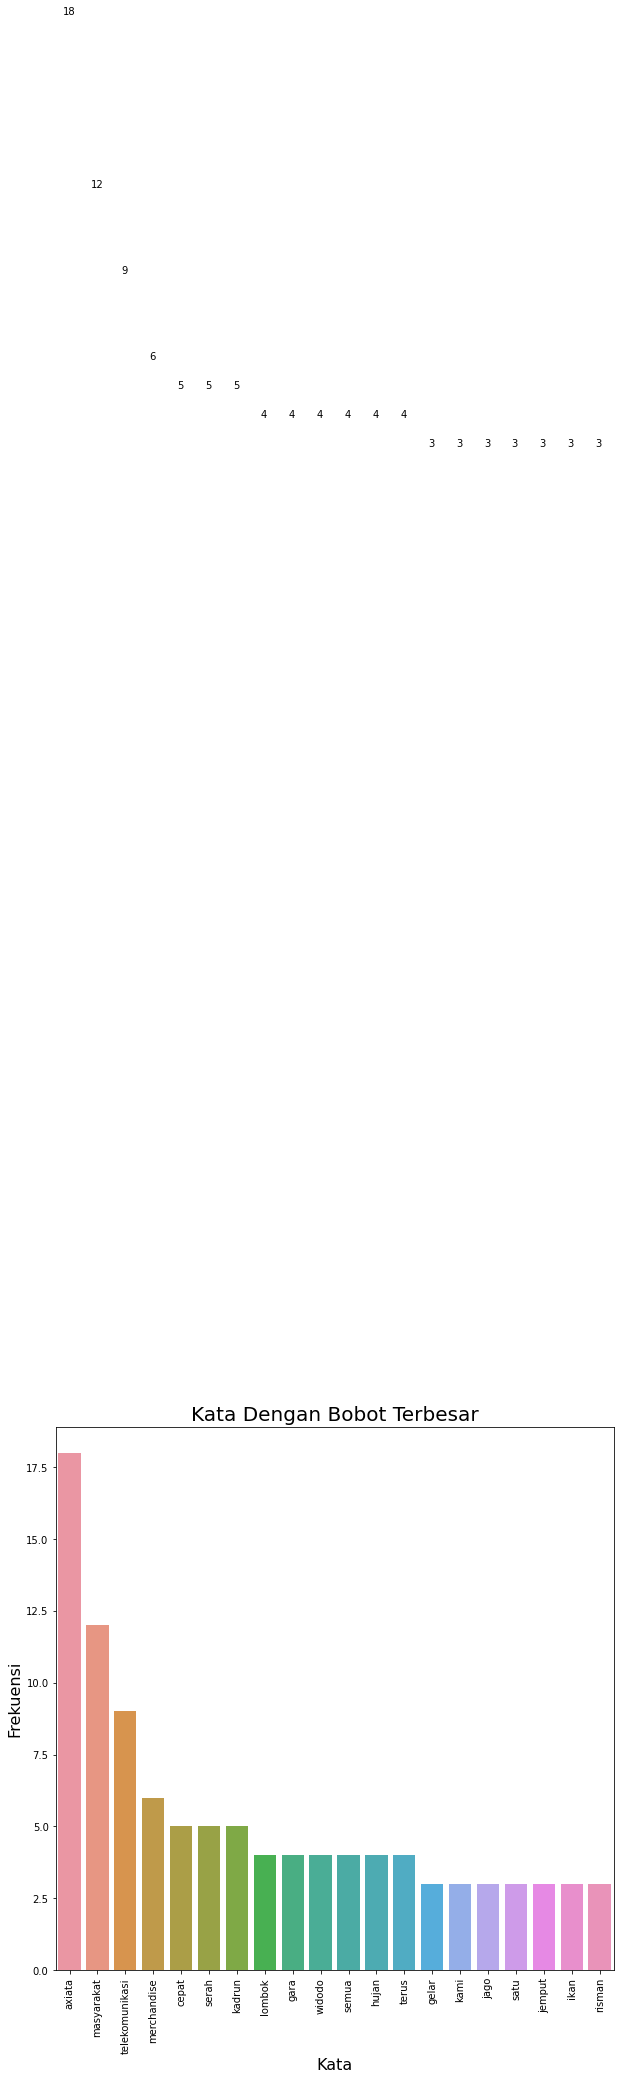

In [18]:
# Plotting Barplot
plt.figure(figsize=(10, 10))
sns.barplot(x=words_data["Kata"], y=words_data["Banyak"])

for i, v in enumerate(words_data["Banyak"].tolist()):
    plt.text(i - len(str(v)) / 10 - 0.05, v + 50, str(v), fontsize=10)
plt.title("Kata Dengan Bobot Terbesar", fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Kata", fontsize=16)
plt.ylabel("Frekuensi", fontsize=16)
plt.show()

### Loading Label Data
Labeling dilakukan secara manual, dengan indikator:
*   0 = Netral
*   1 = Positif
*   2 = Negatif

In [26]:
label = pd.read_csv('clean_dataset_label.csv')
label["tweet_clean"] = label["tweet"].apply(lambda x: preprocessor(x))
label["tweet_clean"] = label["tweet_clean"].apply(lambda x: tokenizer(x))
label = label.drop_duplicates()
label.head()

,Unnamed: 0,date,tweet,username,tweet_clean,label
0,0,3/20/22 23:59,Belajar dari mandalika Tidak semua hal bisa di...,garpulicious,ajar dari mandalika tidak semua bisa terima de...,0
1,1,3/20/22 23:59,@ngawur_post Tikungan 13 Mandalika membuat Mar...,adhimmhrdika,tikung mandalika buat marc marquez jatuh motor...,2
2,2,3/20/22 23:59,@eadala_o1 @kulitbumi TENGKYUUU SO MUCHHH PAK ...,FemmyManroe,tengkyuuu muchhh jokowi acara mandalika suksee...,1
3,3,3/20/22 23:59,"Rara Istiati Wulandari, Ungkap Penyebab Ganggu...",geloraco,rara istiati wulandari ungkap sebab ganggu huj...,0
4,4,3/20/22 23:59,Salah satu yg terpenting bagaimana memelihara ...,dedensujana,salah satu penting bagaimana pelihara circuit ...,0


In [27]:
label["label"].value_counts()

0    309
1    300
2     94
Name: label, dtype: int64

### Fitting Model

In [28]:
x = vectorizer_tfidf.transform(label["tweet_clean"].values)
y = label["label"].values

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=2020)

In [30]:
# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

classifiers = {
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=2020),
    "Logistic Regression": LogisticRegression(random_state=2020),
    "Random Forest Classifier": RandomForestClassifier(random_state=2020),
    "Support Vector Machine": SVC(kernel="linear", probability=True, random_state=2020),
}

for name in classifiers.keys():
    classifiers[name].fit(x_train, y_train)
    y_pred = classifiers[name].predict(x_valid)
    print(f"Akurasi dari {name}\t: ", metrics.accuracy_score(y_valid, y_pred))

Akurasi dari Decision Tree Classifier	:  0.6028368794326241
Akurasi dari Logistic Regression	:  0.6808510638297872
Akurasi dari Random Forest Classifier	:  0.723404255319149
Akurasi dari Support Vector Machine	:  0.6666666666666666


### Prediction

In [41]:
# Decision Tree Classifier
data["DTC_prediction"] = classifiers["Decision Tree Classifier"].predict(word_tfidf)
# Logistic Regression
data["LR_prediction"] = classifiers["Logistic Regression"].predict(word_tfidf)
# Random Forest Classifier
data["RFC_prediction"] = classifiers["Random Forest Classifier"].predict(word_tfidf)
# Support Vector Machine
data["SVM_prediction"] = classifiers["Support Vector Machine"].predict(word_tfidf)
data.sample(n=5)

,date,tweet,username,tweet_clean,DTC_prediction,LR_prediction,RFC_prediction,SVM_prediction
258,2022-03-20 23:02:59,@narul_hidayat @Hilmi28 Mandalika sirkuit ter...,AdeSury73554745,mandalika sirkuit keren terima kasih jokowi in...,1,1,1,1
263,2022-03-20 23:02:00,@XLAxiata_Tbk XL Axiata Bersama Juara di Manda...,wan_3s,axiata sama juara mandalika jadilebihbaik juar...,0,0,0,0
632,2022-03-20 19:41:28,@ilham_dulillahh @wans_stwn @pakulakang_ @snog...,funky_mafia,boneka bisa harga jasa pawang mandalika yang d...,0,0,0,0
366,2022-03-20 22:46:05,"https://t.co/fEiZM12Lmm, LOMBOK - Tikungan 11...",Radar_Cirebon,lombok tikung mandalika sebut bekas kubur cela...,2,0,2,0
514,2022-03-20 21:23:18,Mario Aji Semakin Percaya Diri Usai Cetak Seja...,CNNIndonesia,mario makin percaya diri usai cetak sejarah mo...,0,0,0,0


### Visualization

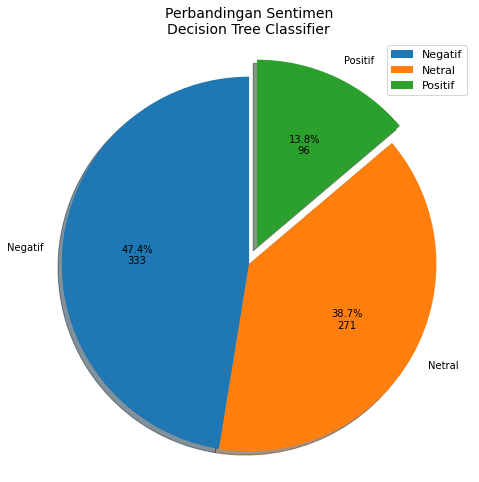

In [42]:
# Decision Tree Classifier
def pct_pie(pct, allvals):
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data["tweet"].groupby(data["DTC_prediction"]).count().values

plt.figure(figsize=(8, 8))
plt.pie(
    sentimen,
    explode=(0, 0, 0.1),
    labels=["Negatif", "Netral", "Positif"],
    shadow=True,
    autopct=lambda pct: pct_pie(pct, sentimen),
    startangle=90,
)
plt.title("Perbandingan Sentimen\nDecision Tree Classifier", fontsize=14)
plt.axis("equal")
plt.legend(fontsize=11)
plt.show()

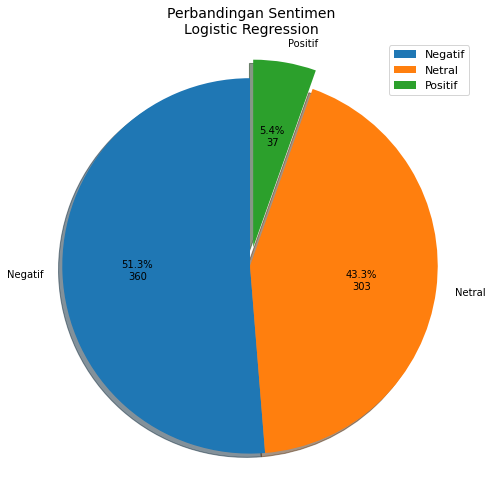

In [43]:
# Logistic Regression
def pct_pie(pct, allvals):
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data["tweet"].groupby(data["LR_prediction"]).count().values

plt.figure(figsize=(8, 8))
plt.pie(
    sentimen,
    explode=(0, 0, 0.1),
    labels=["Negatif", "Netral", "Positif"],
    shadow=True,
    autopct=lambda pct: pct_pie(pct, sentimen),
    startangle=90,
)
plt.title("Perbandingan Sentimen\nLogistic Regression", fontsize=14)
plt.axis("equal")
plt.legend(fontsize=11)
plt.show()

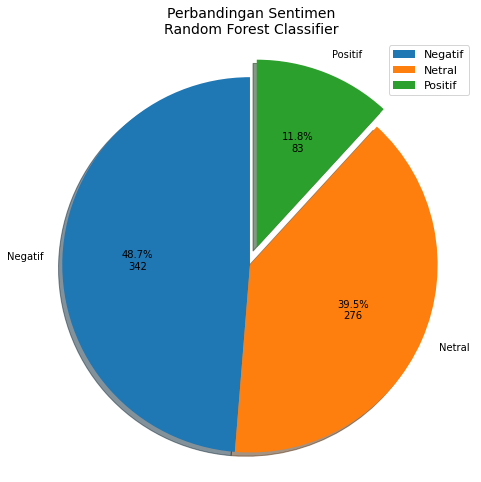

In [44]:
# Random Forest Classifier
def pct_pie(pct, allvals):
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data["tweet"].groupby(data["RFC_prediction"]).count().values

plt.figure(figsize=(8, 8))
plt.pie(
    sentimen,
    explode=(0, 0, 0.1),
    labels=["Negatif", "Netral", "Positif"],
    shadow=True,
    autopct=lambda pct: pct_pie(pct, sentimen),
    startangle=90,
)
plt.title("Perbandingan Sentimen\nRandom Forest Classifier", fontsize=14)
plt.axis("equal")
plt.legend(fontsize=11)
plt.show()

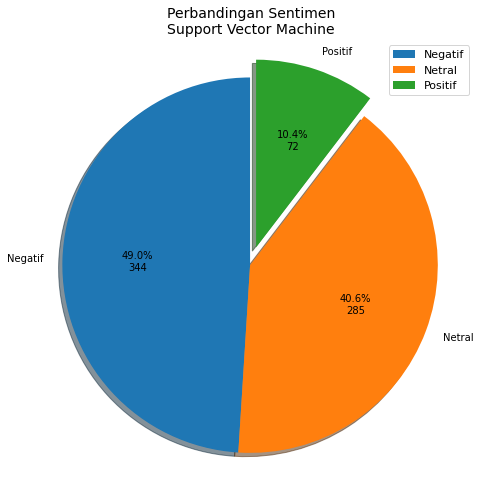

In [45]:
# Support Vector Machine
def pct_pie(pct, allvals):
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data["tweet"].groupby(data["SVM_prediction"]).count().values

plt.figure(figsize=(8, 8))
plt.pie(
    sentimen,
    explode=(0, 0, 0.1),
    labels=["Negatif", "Netral", "Positif"],
    shadow=True,
    autopct=lambda pct: pct_pie(pct, sentimen),
    startangle=90,
)
plt.title("Perbandingan Sentimen\nSupport Vector Machine", fontsize=14)
plt.axis("equal")
plt.legend(fontsize=11)
plt.show()